In [1]:
from timeseria import logger
logger.setup(level='INFO')


# Plotting


This notebook showcase various plots that can be made with [Timeseria](https://github.com/sarusso/Timeseria).

In [2]:
from timeseria import storages

# Set sataset path to Timeria test CSV data
DATASET_PATH = '/'.join(storages.__file__.split('/')[0:-1]) + '/tests/test_data/csv/'

# Create a CSV storage pointing to a temperature and humidity dataset
csv_storage = storages.CSVFileStorage(DATASET_PATH + 'humitemp_long.csv')

# Get the time series out from the CSV file storage (limiting to 5000 elements)
timeseries = csv_storage.get(limit=5000)

### Simple plot

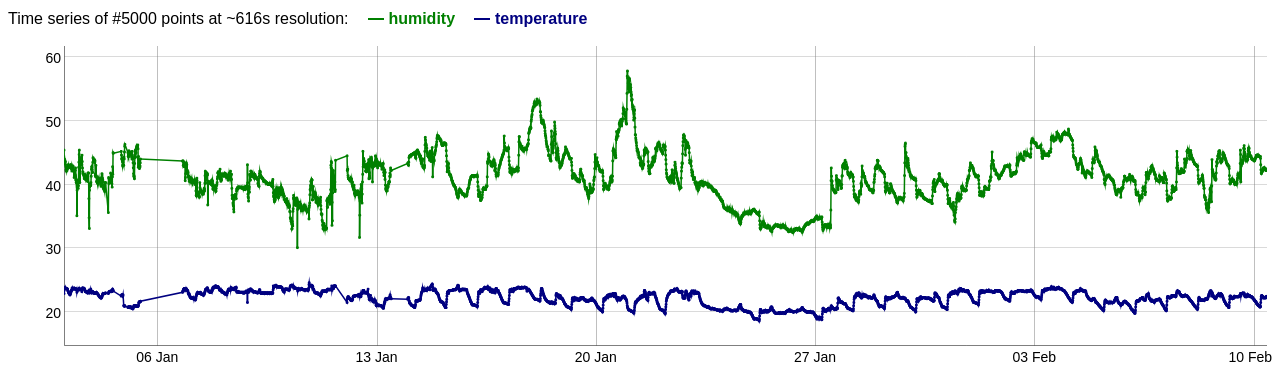

In [3]:
timeseries.plot()

### Add a series mark

A series mark can be usefult to show a specific portion of the time series, quickly:

In [4]:
from timeseria.time import dt
timeseries.mark=(dt(2019,1,20,12,0),dt(2019,1,21,12,0))
timeseries.mark_title='Humidity peak'

[INFO] timeseria.plots: Found series mark and showing it


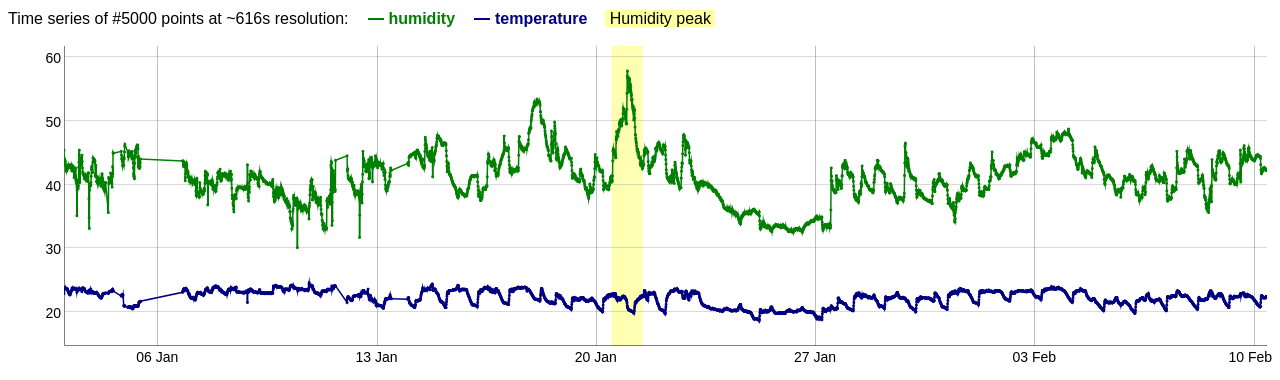

In [5]:
timeseries.plot()

### Plot only some labels

[INFO] timeseria.plots: Found series mark and showing it


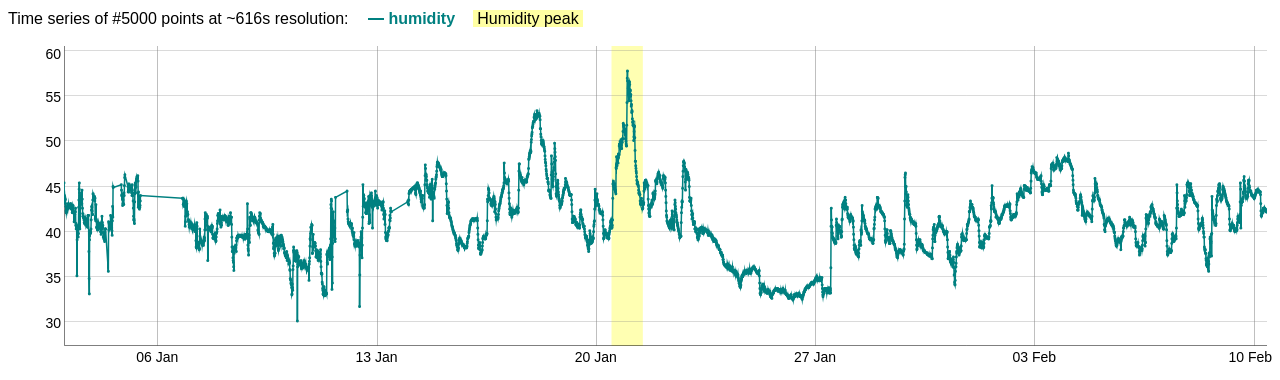

In [6]:
timeseries.plot(data_labels=['humidity'])

### Add custom data indexes

The data indexes in Timeseria are mainly used for showing data losses, reconstructed and forecasted data, and anomalies, but can be custom-defined as well and are rendered as an area chart underlying the time seris. They must be in the 0-1 range.

In [7]:
# Create a (made up) "humitemp_ratio" index
for datapoint in timeseries:
    datapoint.data_indexes['humitemp_ratio'] = 300/datapoint.data['humidity']/datapoint.data['temperature']

[INFO] timeseria.plots: Found series mark and showing it


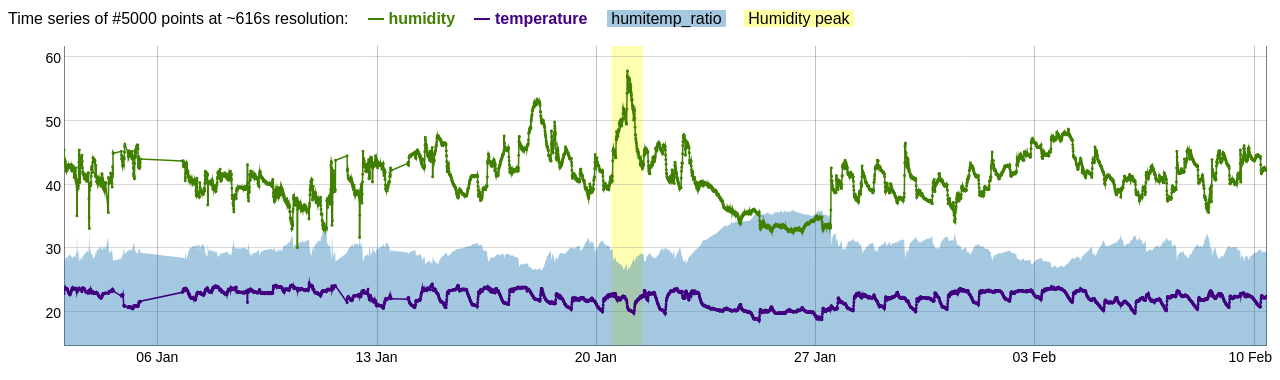

In [8]:
timeseries.plot()

### Plot only some data indexes

In [9]:
resampled_timeseries = timeseries.resample(600)

[INFO] timeseria.transformations: Using auto-detected sampling interval: 615.0s
[INFO] timeseria.transformations: Resampled 5000 DataTimePoints in 5530 DataTimePoints


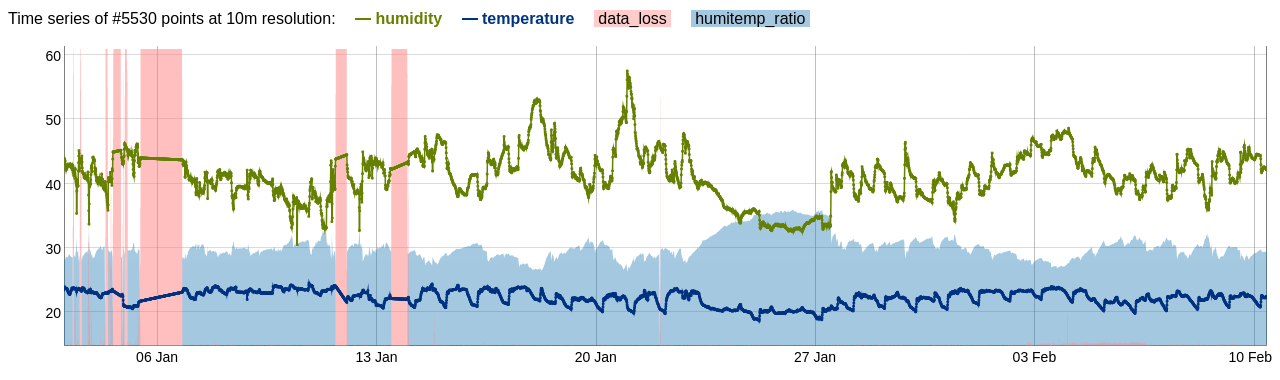

In [10]:
resampled_timeseries.plot()

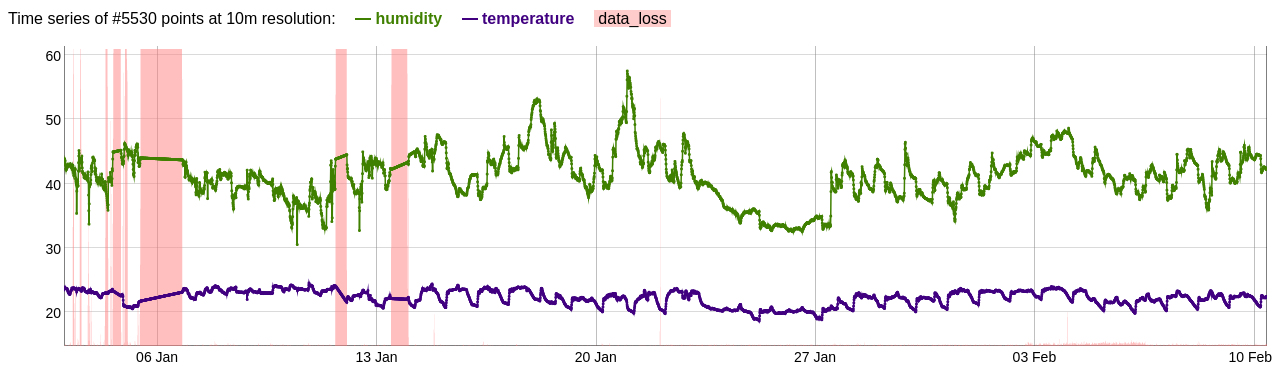

In [11]:
resampled_timeseries.plot(data_indexes=['data_loss'])

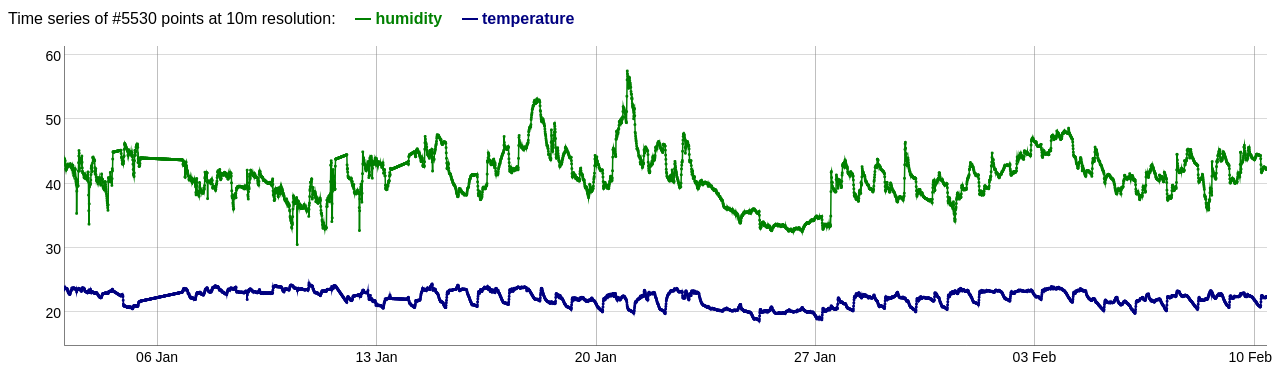

In [12]:
resampled_timeseries.plot(data_indexes=None)

### Handle plot-level aggregations

Plot-level aggregation for long (>1000 datapoints) series is enabled by default in order to speed up plotting. These are rendered using the average valuea and an underlying area chart containing the minumum and maximum values:

In [13]:
full_timeseries = csv_storage.get()

[INFO] timeseria.plots: Aggregating by "10" for improved plotting


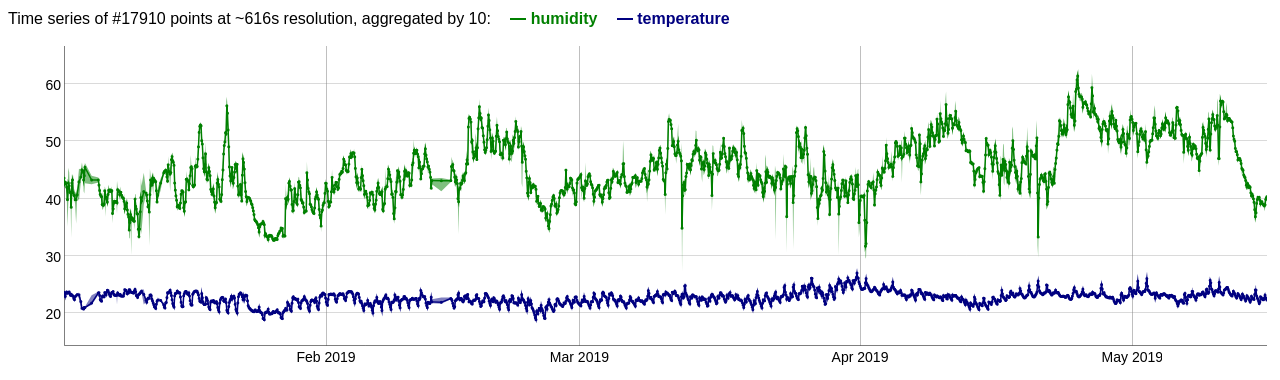

In [14]:
full_timeseries.plot()

Disable plot-level aggregation for long (>1000 datapoints) series. Warning, might crash your browser!

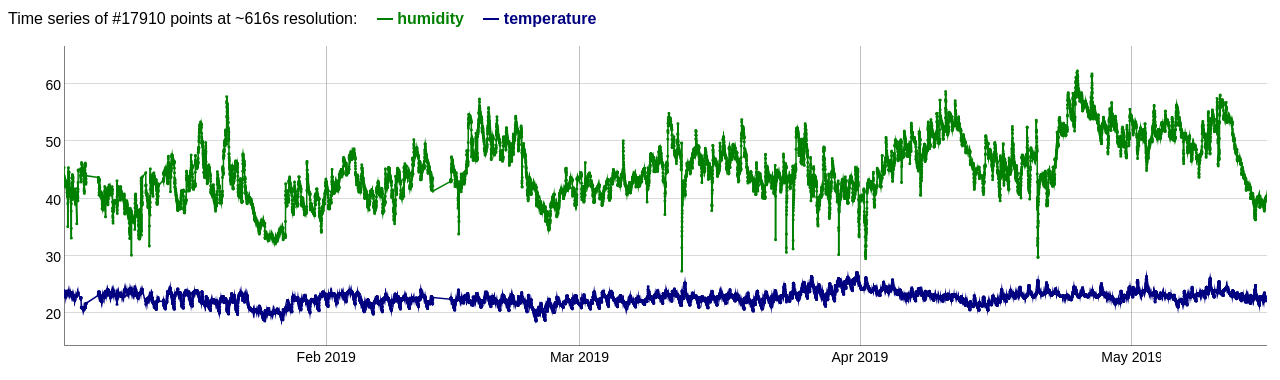

In [15]:
full_timeseries.plot(aggregate=False)

Plot-level aggregations can be enabled even manually should there be a need for this:

[INFO] timeseria.plots: Aggregating by "10" for improved plotting


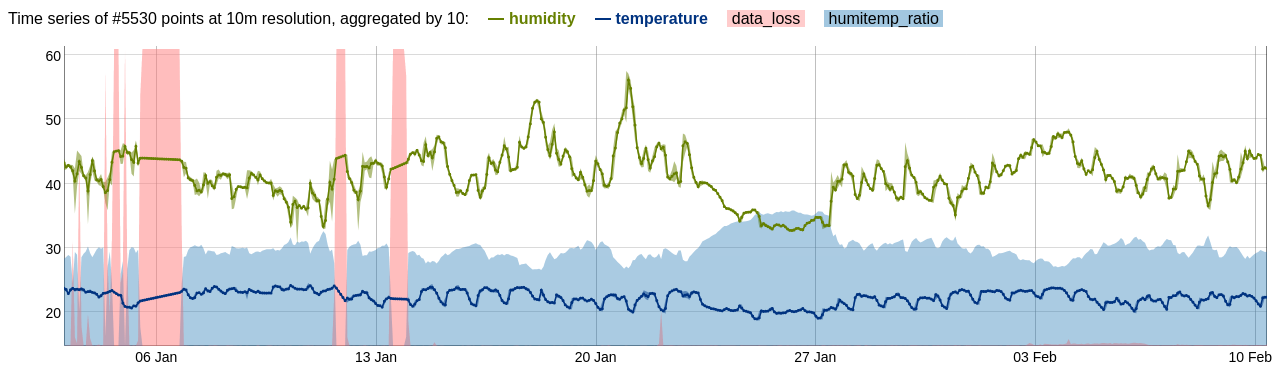

In [16]:
resampled_timeseries.plot(aggregate_by=10)

[INFO] timeseria.plots: Aggregating by "100" for improved plotting


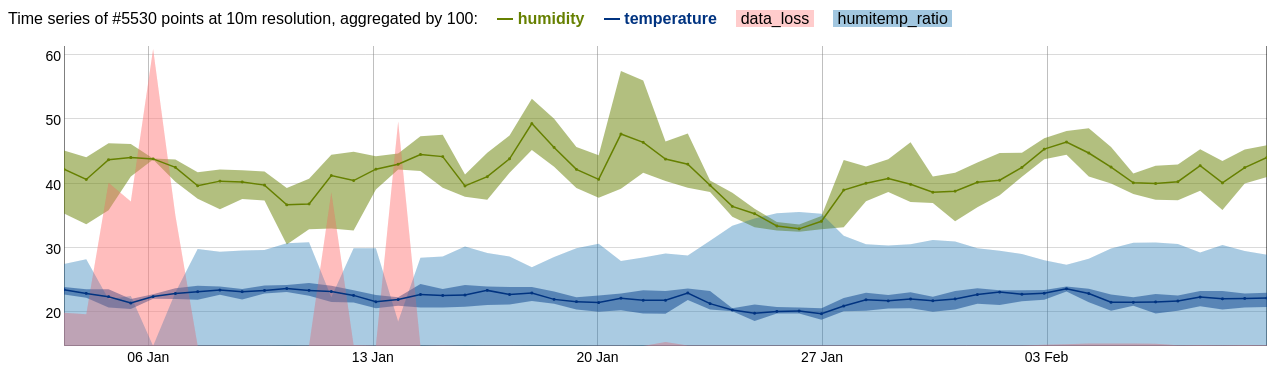

In [17]:
resampled_timeseries.plot(aggregate_by=100)

### Plot aggregated series

In [18]:
three_hourly_timeseries = resampled_timeseries.aggregate('3h')

[INFO] timeseria.transformations: Using auto-detected sampling interval: 600.0s
[INFO] timeseria.transformations: Aggregated 5530 DataTimePoints in 306 DataTimeSlots


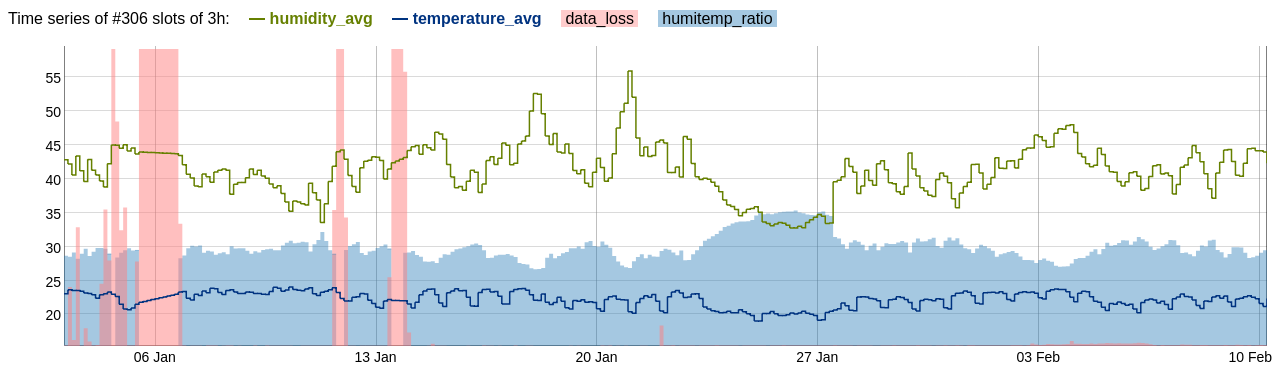

In [19]:
three_hourly_timeseries.plot()

[INFO] timeseria.plots: Aggregating by "8" for improved plotting


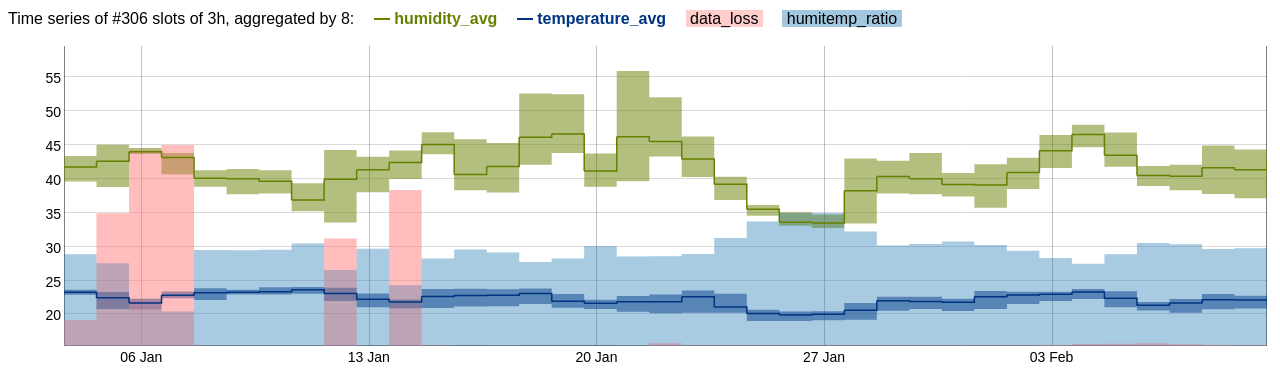

In [20]:
three_hourly_timeseries.plot(aggregate_by=8)

### Plot with full precision
Plot with (nearly) full precision, using 6 figures.

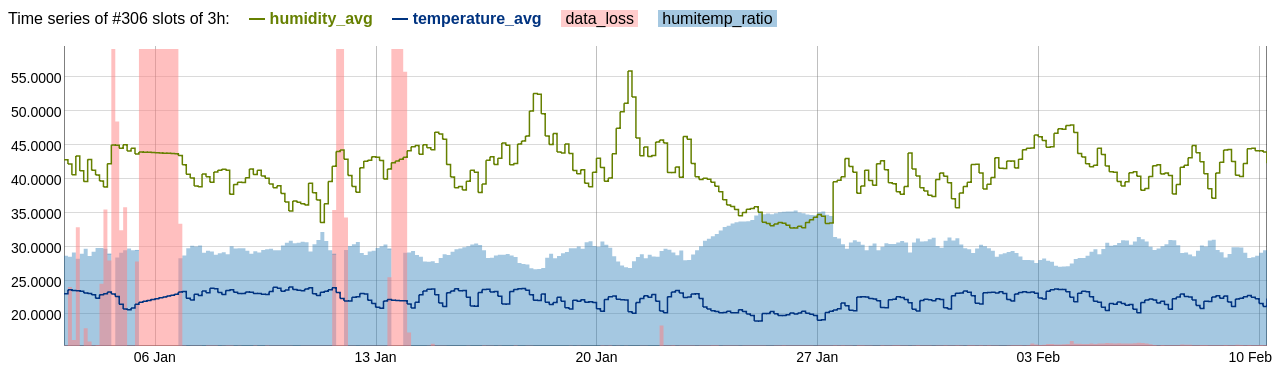

In [21]:
three_hourly_timeseries.plot(full_precision=True)